# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

print("Tensor flow version:", tf.__version__)

Tensor flow version: 2.9.1


# Basic architecture of a NN

* Input layer: same as the number of samples
* Hidden layer: Unlimited, minumum 1
* Output layer: same as the number of desired outputs (number of classes, if regression, 1)

***there are more parameters, they will be covered in more detail latter***

**Regression problem, is simple words, is predicting a number, so lets get going! :)**

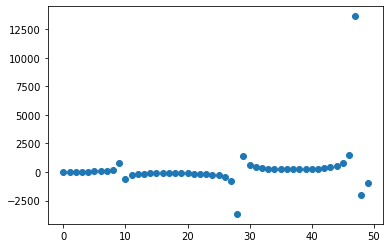

In [2]:
# Lets create some data to fit
X = np.array([number for number in range(0, 50)])
rand = randint(0, 50) # -> Define a fixed random number that will multiply x
Y = np.array([(number * rand) / np.cos(number/rand) for number in X])

# Scater
plt.scatter(X, Y);

# Inputs and outputs shapes

In [34]:
# Input shape
X[0].shape

()

In [35]:
# Output shape
Y[0].shape

()

**But hold ON! If you try to train the model with this, you will encounter problems, bexause tensorflow 2.7+ requires the data to have at least 2 dimensions, in your case the data has 1 dimension mathematicaly speaking, and 0 ("tensorflowing" speaking)**

***lets fix the data dimensions***

In [3]:
X = tf.expand_dims(X, axis=-1)
Y = tf.expand_dims(Y, axis=-1)

**This is odd, but correct, because the input is a scalar, with has 0 dimensions in tensor flow, and the output as 0 dimensions too**

In [ ]:
# Let"s build a model to fit this problem

# Step 1: Create a model: Define the layers (input, hidden, output, and maybe others)

# Set random seed
tf.random.set_seed(32)

# Model
model = tf.keras.Sequential([ # -> Sequential API make the layers in the coded order
    tf.keras.layers.Dense(1) # -> Just one layer (with 1 neuron)
])

# Step 2: Compile the model 
model.compile(
    loss=tf.keras.losses.mae, # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"] # See how the model is going with this metric
)

## Define the loss function: The funciton that says how much the model is wrong;
## Define the optimizer: The funcitons that says how your model can improve;
## Dine eval metrics: The functions that can interpret the performance of your model;

# Step 3: Fitting the model: Letting the model find the relations
model.fit(X, Y, epochs=50) # -> How have 50 epochs to learn the patterns

In [37]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49]])>,
 <tf.Tensor: shape=(50, 1), dtype=float64, numpy=
 array([[   0.        ],
        [  49.01020585],
        [  98.08168936],
        [ 147.27594117],
        [ 196.65487946],
        [ 246.2810675 ],
        [ 296.21793588],
        [ 346.53001097],

In [ ]:
# Predict ussing the model
model.predict([12])

**Okay, your predictions are a shit, how to improve them?**

# Improving the model

Options:

* Add more layers to the model (or change number of neuros and activation functions)
* Change the optimization function
* Change the learning rate
* Increase the number of epochs

In [39]:
# Lets build a new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics=["mae"])

# Fit
model.fit(X, Y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 1604.1711 - mae: 1604.1711
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 1592.3237 - mae: 1592.3237
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 1580.2606 - mae: 1580.2606
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 1568.0056 - mae: 1568.0056
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 1556.0637 - mae: 1556.0637
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 1544.3168 - mae: 1544.3168
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 1532.4261 - mae: 1532.4261
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 1519.9888 - mae: 1519.9888
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 1507.7484 - mae: 1507.7484
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 1495.6614 - mae: 1495.6614
Epoch 11/100
2/2 [=

# Evaluating a model performance

**To evaluate a model, you want to visualize a lot**

But what?

Its good to visualize:
1. How is the data that we are wotking on
2. The model? How does our model look
3. How the model is perfoming while learning
4. The predictions? Where the model is missing?

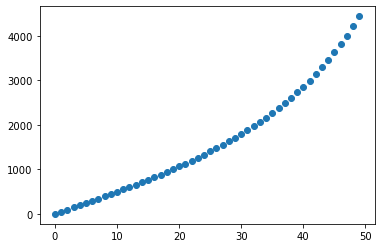

In [41]:
# Look at the data!
plt.scatter(X, Y);

In [4]:
# Split X and Y
xtr, xte, ytr, yte = train_test_split(np.array(X), np.array(Y), test_size=0.20)

C:\Users\pedro\AppData\Local\Temp\ipykernel_19312\541986225.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = d1.append(d2)


<AxesSubplot:xlabel='X', ylabel='Y'>

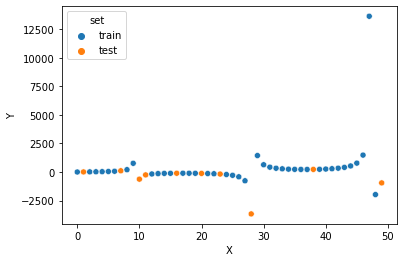

In [5]:
# Plot train and test data together
d1 = pd.DataFrame(xtr, columns=["X"])
d1["Y"] = ytr
d1["set"] = "train"

d2 = pd.DataFrame(xte, columns=["X"])
d2["Y"] = yte
d2["set"] = "test"

data = d1.append(d2)
sns.scatterplot(data=data, x="X", y="Y", hue="set")

In [16]:
# Lets build a new NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit
model.fit(xtr, ytr, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 692.0898 - mae: 692.0898
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 684.9796 - mae: 684.9796
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 669.7499 - mae: 669.7499
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 651.6057 - mae: 651.6057
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 633.8337 - mae: 633.8337
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 637.3434 - mae: 637.3434
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 634.0389 - mae: 634.0389
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 633.7985 - mae: 633.7985
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 633.5480 - mae: 633.5480
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 633.4204 - mae: 633.4204
Epoch 11/100
2/2 [=====================

In [64]:
# # I want to see the summary of the model but tensorflow says that i need to build it first, so lets build the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape=[1]) # Input shape is one, vector
# ])

# # Compile the model
# model.compile(loss=tf.keras.losses.mae,
#     optimizer=tf.keras.optimizers.SGD(),
#     metrics=["mae"])

# model.summary() # IT WORKS!

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Summary returns:
- The output shape
- The layers and its types
- Trainable parameters: Number of parameters that the model can change while training
- Total parameters: Total number of parameters
- Non-trainable parameters: Freezed parameters, the model will not change these (normal when ussing pre saved models)

What are this parameters?
- Bias
- Weights

Learn more her: https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini